# __Search image by text__ 

**Understand text digitization techniques**
---
👉 Natural languages must be quantified for computers to understand them. Recently, research on pre-learning models such as BERT and GPT-3 has been actively conducted and has shown remarkable results. Based on self-supervised learning, these models grasp the meaning of each sentence and represent each sentence with a similar meaning in a low-dimensional space in close proximity. By randomly mixing the order between sentences or masking some words to determine whether each sentence/context is true or false, it supports learning without labeling.

**In this tutorial**
---
👉 Unsplash released images of more than 200,000 photographers for free as a dataset for AI. Unsplash Dataset - Lite consists of 25,000 nature-themed images, and comes with 25,000 keywords.

In this tutorial, we will use the text-image search model to search for the desired image in text from 25,000 images in the Unsplash Dataset - Lite dataset in ThanoSQL DB.

## __0. Preparing a dataset__

To use the query syntax of ThanoSQL, you must create an API token and run the query below, as mentioned in the [ThanoSQL Workspace](https://docs.thanosql.ai/quick_start/how_to_use_ThanoSQL/#5-thanosql).

In [ ]:
%load_ext thanosql
%thanosql API_TOKEN=<Issued_API_TOKEN>

In [2]:
%%thanosql
COPY unsplash_data 
OPTIONS(overwrite = True)
FROM 'tutorial_data/unsplash_data/unsplash.csv'

Success


__OPTIONS__ : 

When __overwrite is true__, the user can create a data table with the same name as the previously created data table.  
On the other hand, when __overwrite is False__, the user cannot create a data table with the same name as the previously created data table.

## __1. Check dataset__

To create a text-image search model, we use the unsplash_data table stored in the ThanoSQL DB. Run the query statement below and check the contents of the table.

In [3]:
%%thanosql
SELECT photo_id, image_path, photo_image_url, photo_description, ai_description
FROM unsplash_data
LIMIT 5

,photo_id,filepath,photo_image_url,photo_description,ai_description
0,XMyPniM9LF0,tutorial_data/unsplash_data/XMyPniM9LF0.jpg,https://images.unsplash.com/uploads/1411949294...,Woman exploring a forest,woman walking in the middle of forest
1,rDLBArZUl1c,tutorial_data/unsplash_data/rDLBArZUl1c.jpg,https://images.unsplash.com/photo-141633941111...,Succulents in a terrarium,succulent plants in clear glass terrarium
2,cNDGZ2sQ3Bo,tutorial_data/unsplash_data/cNDGZ2sQ3Bo.jpg,https://images.unsplash.com/photo-142014251503...,Rural winter mountainside,rocky mountain under gray sky at daytime
3,iuZ_D1eoq9k,tutorial_data/unsplash_data/iuZ_D1eoq9k.jpg,https://images.unsplash.com/photo-141487280988...,Poppy seeds and flowers,red common poppy flower selective focus phography
4,BeD3vjQ8SI0,tutorial_data/unsplash_data/BeD3vjQ8SI0.jpg,https://images.unsplash.com/photo-141700759404...,Silhouette near dark trees,trees during night time


__Understanding Data__
- `photo_id` Unique id column name for image
- `image_path` Column name of the path where the image is located
- `photo_image_url` Column name representing the source image address in the website unsplash
- `photo_description` The name of the column that represents a short human-generated description of the image
- `ai_description` Column name that represents the description of the image created by AI

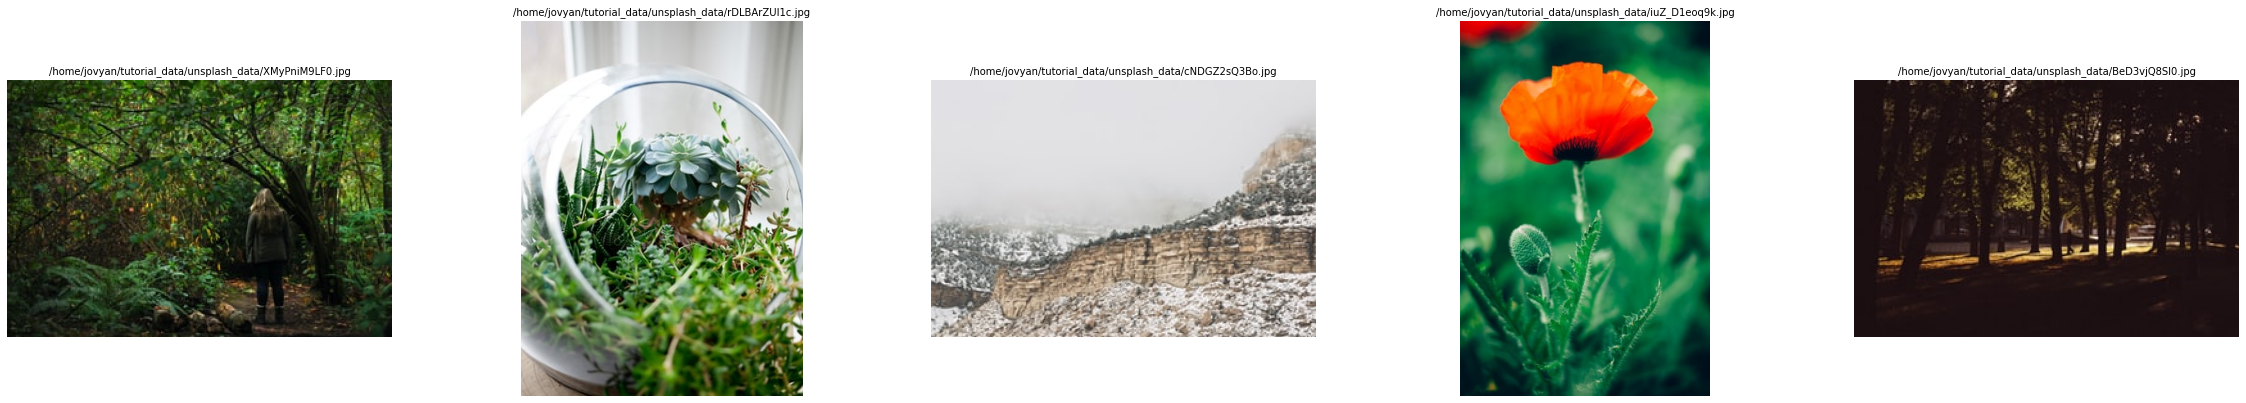

In [4]:
%%thanosql
PRINT IMAGE 
AS
SELECT image_path 
FROM unsplash_data 
LIMIT 5

## __2. Create an image quantization model for text retrieval__

__Note__

Because the text-image search algorithm takes a long time to learn and uses a pre-trained model with a total of 400 million datasets, the learning process using the "BUILD MODEL" query syntax is omitted in this tutorial. The tutorial_search_clip model is a base algorithm that uses a pre-learned model using clippen. Running the "CONVERT USING" query syntax automatically creates columns that are digitized by the "tutorial_search_clip_base algorithm name (clipen)", and running the "SEARCH IMAGE" query syntax automatically creates columns similar to the "tutorial_search_clip"_base image (1 pen) color. The excitation number "number" refers to the number of text used in the search. If a search is performed with more than one text, the number of columns is increased sequentially according to the order. Please refer to the details below for details below.

(Expected time required for query execution: 3 min)

In [5]:
%%thanosql
CONVERT USING tutorial_search_clip
OPTIONS (
    image_col="image_path", 
    table_name="unsplash_data", 
    batch_size=128
    )
AS 
SELECT *
FROM unsplash_data

,photo_id,filepath,photo_image_url,photo_description,ai_description,tutorial_search_clip_clipen
0,XMyPniM9LF0,tutorial_data/unsplash_data/XMyPniM9LF0.jpg,https://images.unsplash.com/uploads/1411949294...,Woman exploring a forest,woman walking in the middle of forest,"[-0.17438656091690063, 0.6451413035392761, 0.1..."
1,rDLBArZUl1c,tutorial_data/unsplash_data/rDLBArZUl1c.jpg,https://images.unsplash.com/photo-141633941111...,Succulents in a terrarium,succulent plants in clear glass terrarium,"[-0.3728145956993103, 0.33979475498199463, -0...."
2,cNDGZ2sQ3Bo,tutorial_data/unsplash_data/cNDGZ2sQ3Bo.jpg,https://images.unsplash.com/photo-142014251503...,Rural winter mountainside,rocky mountain under gray sky at daytime,"[-0.3593713641166687, 0.6117455959320068, 0.15..."
3,iuZ_D1eoq9k,tutorial_data/unsplash_data/iuZ_D1eoq9k.jpg,https://images.unsplash.com/photo-141487280988...,Poppy seeds and flowers,red common poppy flower selective focus phography,"[0.020821183919906616, 0.116732656955719, -0.2..."
4,BeD3vjQ8SI0,tutorial_data/unsplash_data/BeD3vjQ8SI0.jpg,https://images.unsplash.com/photo-141700759404...,Silhouette near dark trees,trees during night time,"[-0.26649242639541626, 0.15510249137878418, -0..."
...,...,...,...,...,...,...
24963,c7OrOMxrurA,tutorial_data/unsplash_data/c7OrOMxrurA.jpg,https://images.unsplash.com/photo-159300793778...,None,black metal fence during daytime,"[-0.1355738639831543, -0.02573675662279129, -0..."
24964,15IuQ5a0Qwg,tutorial_data/unsplash_data/15IuQ5a0Qwg.jpg,https://images.unsplash.com/photo-159296761254...,Pearl earrings and seashells,white and brown seashell on white surface,"[-0.3145016133785248, 0.5612751245498657, 0.17..."
24965,w8nrcXz8pwk,tutorial_data/unsplash_data/w8nrcXz8pwk.jpg,https://images.unsplash.com/photo-159299937329...,None,leopard on brown tree trunk during daytime,"[0.14168781042099, -0.36150914430618286, -0.10..."
24966,n1jHrRhehUI,tutorial_data/unsplash_data/n1jHrRhehUI.jpg,https://images.unsplash.com/photo-159192792878...,Floral truck in the streets of Rome,woman in beige coat and white hat standing on ...,"[0.05573965609073639, -0.014394136145710945, 0..."


__Query Details__ 

- The query syntax "__CONVERT USING__" uses the 'tutorial_search_clip' model as an algorithm for image quantification.  
- The "__OPTIONS__" query syntax defines the variables required for image quantification. Defines the table name ("table_name") to be stored within the ThanoSQL DB. Define the column name where you saved the image's storage path in "image_col". Use 'image_path' in this tutorial. "batch_size" is the size of a bundle of datasets read in one learning. According to the paper, the larger the learning performance increases, but we use 128 considering the size of the memory.

In [6]:
%%thanosql
SELECT *
FROM unsplash_data
LIMIT 5

,photo_id,filepath,photo_image_url,photo_description,ai_description,tutorial_search_clip_clipen
0,XMyPniM9LF0,tutorial_data/unsplash_data/XMyPniM9LF0.jpg,https://images.unsplash.com/uploads/1411949294...,Woman exploring a forest,woman walking in the middle of forest,"[-0.17438656091690063, 0.6451413035392761, 0.1..."
1,rDLBArZUl1c,tutorial_data/unsplash_data/rDLBArZUl1c.jpg,https://images.unsplash.com/photo-141633941111...,Succulents in a terrarium,succulent plants in clear glass terrarium,"[-0.3728145956993103, 0.33979475498199463, -0...."
2,cNDGZ2sQ3Bo,tutorial_data/unsplash_data/cNDGZ2sQ3Bo.jpg,https://images.unsplash.com/photo-142014251503...,Rural winter mountainside,rocky mountain under gray sky at daytime,"[-0.3593713641166687, 0.6117455959320068, 0.15..."
3,iuZ_D1eoq9k,tutorial_data/unsplash_data/iuZ_D1eoq9k.jpg,https://images.unsplash.com/photo-141487280988...,Poppy seeds and flowers,red common poppy flower selective focus phography,"[0.020821183919906616, 0.116732656955719, -0.2..."
4,BeD3vjQ8SI0,tutorial_data/unsplash_data/BeD3vjQ8SI0.jpg,https://images.unsplash.com/photo-141700759404...,Silhouette near dark trees,trees during night time,"[-0.26649242639541626, 0.15510249137878418, -0..."


You can see that the column `tutorial_search_clip_clip` was created as a result of the `CONVERT` query. A column containing the embedding value will be added with the name `{model_name}_{base_model_name}`.

## ___3. Search for images in text__

You can search for images using the query syntax "__SEARCH IMAGE__" and the image quantization model you created (`tutorial_search_clip`). First, search in one text and see the results. "Model name (`tutorial_search_clip`)_base algorithm name (`clip`)_similarity number (1))" confirms that the image similarity column is automatically generated.

In [7]:
%%thanosql
SEARCH IMAGE text="a black cat"
USING tutorial_search_clip
AS 
SELECT * 
FROM unsplash_data

,photo_id,filepath,photo_image_url,photo_description,ai_description,tutorial_search_clip_clipen,tutorial_search_clip_clipen_similarity1
0,XMyPniM9LF0,tutorial_data/unsplash_data/XMyPniM9LF0.jpg,https://images.unsplash.com/uploads/1411949294...,Woman exploring a forest,woman walking in the middle of forest,"[-0.17438656091690063, 0.6451413035392761, 0.1...",0.185728
1,rDLBArZUl1c,tutorial_data/unsplash_data/rDLBArZUl1c.jpg,https://images.unsplash.com/photo-141633941111...,Succulents in a terrarium,succulent plants in clear glass terrarium,"[-0.3728145956993103, 0.33979475498199463, -0....",0.148419
2,cNDGZ2sQ3Bo,tutorial_data/unsplash_data/cNDGZ2sQ3Bo.jpg,https://images.unsplash.com/photo-142014251503...,Rural winter mountainside,rocky mountain under gray sky at daytime,"[-0.3593713641166687, 0.6117455959320068, 0.15...",0.187698
3,iuZ_D1eoq9k,tutorial_data/unsplash_data/iuZ_D1eoq9k.jpg,https://images.unsplash.com/photo-141487280988...,Poppy seeds and flowers,red common poppy flower selective focus phography,"[0.020821183919906616, 0.116732656955719, -0.2...",0.177496
4,BeD3vjQ8SI0,tutorial_data/unsplash_data/BeD3vjQ8SI0.jpg,https://images.unsplash.com/photo-141700759404...,Silhouette near dark trees,trees during night time,"[-0.26649242639541626, 0.15510249137878418, -0...",0.218840
...,...,...,...,...,...,...,...
24963,c7OrOMxrurA,tutorial_data/unsplash_data/c7OrOMxrurA.jpg,https://images.unsplash.com/photo-159300793778...,None,black metal fence during daytime,"[-0.1355738639831543, -0.02573675662279129, -0...",0.226392
24964,15IuQ5a0Qwg,tutorial_data/unsplash_data/15IuQ5a0Qwg.jpg,https://images.unsplash.com/photo-159296761254...,Pearl earrings and seashells,white and brown seashell on white surface,"[-0.3145016133785248, 0.5612751245498657, 0.17...",0.147163
24965,w8nrcXz8pwk,tutorial_data/unsplash_data/w8nrcXz8pwk.jpg,https://images.unsplash.com/photo-159299937329...,None,leopard on brown tree trunk during daytime,"[0.14168781042099, -0.36150914430618286, -0.10...",0.227050
24966,n1jHrRhehUI,tutorial_data/unsplash_data/n1jHrRhehUI.jpg,https://images.unsplash.com/photo-159192792878...,Floral truck in the streets of Rome,woman in beige coat and white hat standing on ...,"[0.05573965609073639, -0.014394136145710945, 0...",0.169805


__Query Details__ 
- State that you will find the image using the query syntax "__SEARCH IMAGE__". Use the "text" variable to enter the text content of the image you want to find. 
- The query syntax "__USING__" specifies the use of 'tutorial_search_clip' as the model to be used for the search.

You can see that the row `tutorial_search_clip_clip_similarity1` was created as a result of the query syntax. To use as a search algorithm, you need to select and view the most similar images using similarity calculations. Perform the query syntax below to see the five images that are most similar to the text in the DB.

In [ ]:
%%thanosql
SEARCH IMAGE text="a black cat"
USING tutorial_search_clip
AS 
SELECT * 
FROM unsplash_data

__Query Details__ 
- State that you will find the image using the query syntax "__SEARCH IMAGE__". Use the "text" variable to enter the text content of the image you want to find. 
- The query syntax "__USING__" specifies the use of `tutorial_search_clip` as the model to be used for the search.

You can see that the row `tutorial_search_clip_clip_similarity1` was created as a result of the query syntax. To use as a search algorithm, you need to select and view the most similar images using similarity calculations. Perform the query syntax below to see the five images that are most similar to the text in the DB.

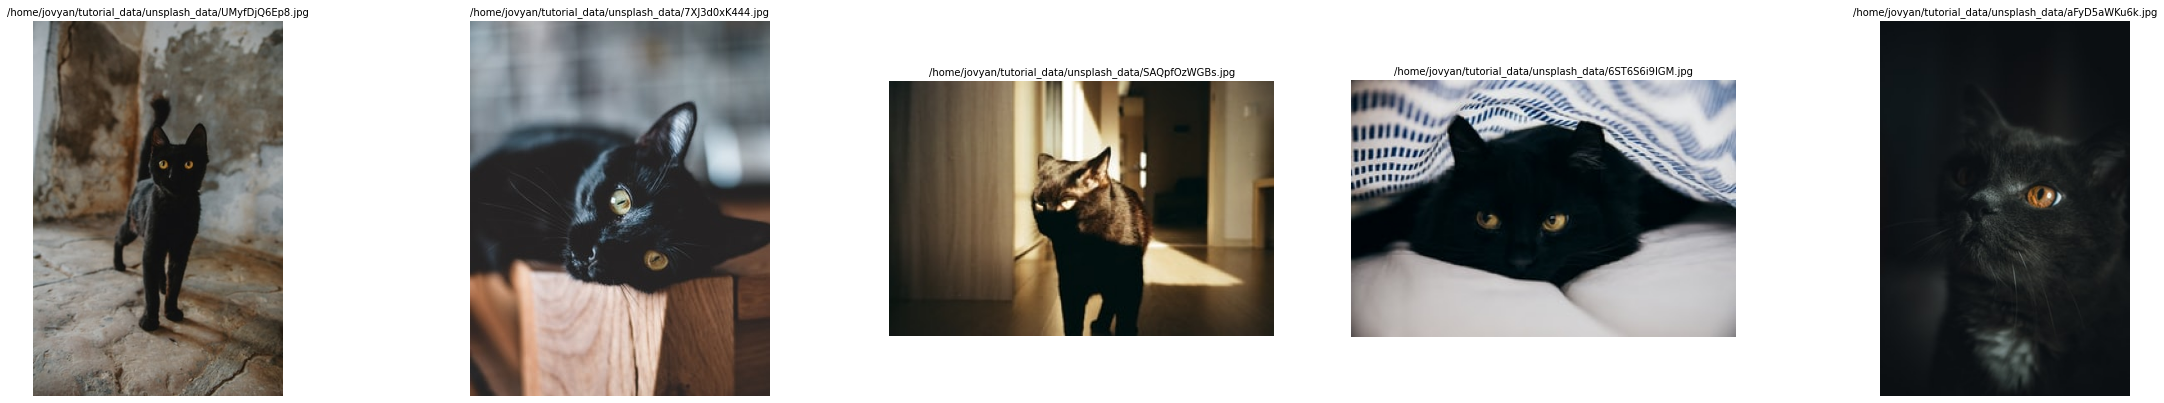

In [9]:
%%thanosql
SELECT image_path, tutorial_search_clip_clipen_similarity1 
FROM (
    SEARCH IMAGE text="a black cat"
    USING tutorial_search_clip
    AS 
    SELECT * 
    FROM unsplash_data
    )
ORDER BY tutorial_search_clip_clipen_similarity1 DESC 
LIMIT 5

__Query Details__

- The query syntax "__SEARCH IMAGE__" calculates and returns the similarity between the text and the image you entered.
- The first "__SELECT__" query syntax selects the "filepath" column and the `tutorial_search_clip_clip_similarity1` column from the query results in parentheses. At this time, the `filepath` column is changed to the name of the column `image`.
- The "_ORDER BY__" query syntax sorts the results by the value in the column `tutorial_search_clip_clip_similarity1`, which is in descending order ("__DESC__", and outputs the results of the top five ("__LIMIT_" 5).

The images most similar to the text 'a black cat' you entered are now displayed in order. If you use this query syntax with the statement "__PRINT__", you can see the result image immediately.

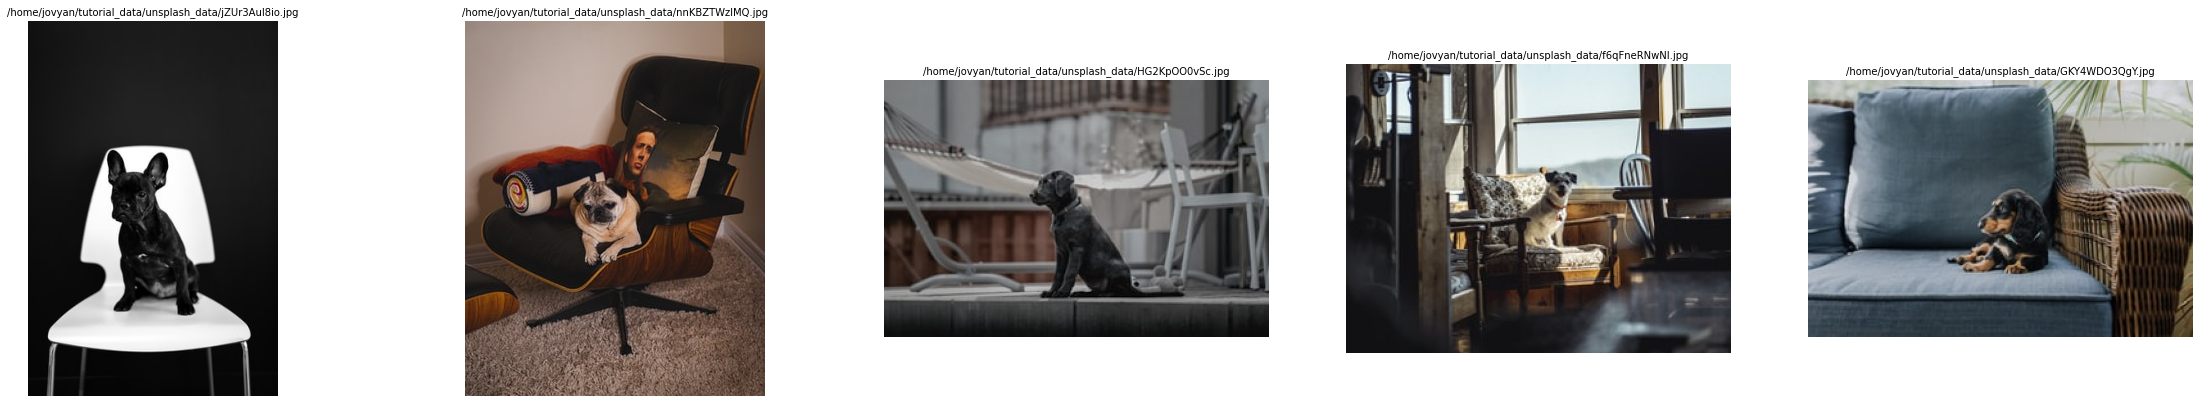

In [10]:
%%thanosql
PRINT IMAGE 
AS (
    SELECT image_path 
    AS image_path, tutorial_search_clip_clipen_similarity1 
    FROM (
        SEARCH IMAGE text="a black cat"
        USING tutorial_search_clip
        AS 
        SELECT * 
        FROM unsplash_data
        )
    ORDER BY tutorial_search_clip_clipen_similarity1 DESC 
    LIMIT 5
    )

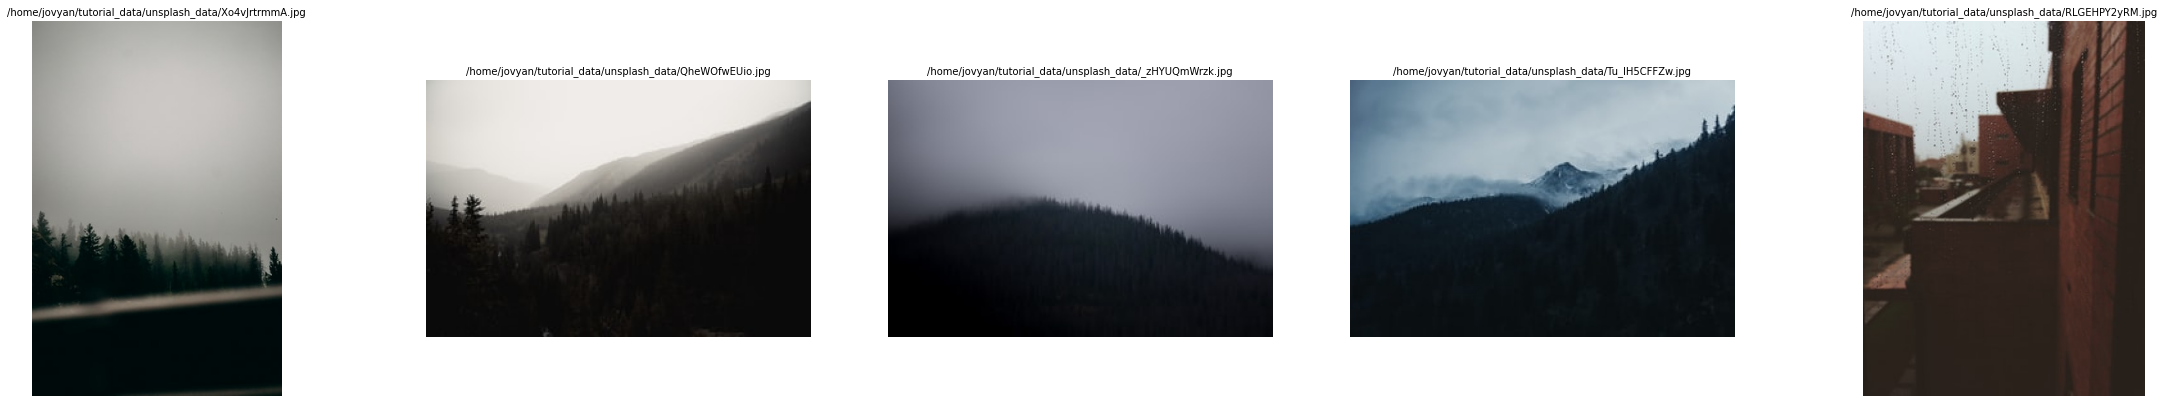

In [11]:
%%thanosql
PRINT IMAGE 
AS (
    SELECT image_path, tutorial_search_clip_clipen_similarity1 
    FROM (
        SEARCH IMAGE text="a dog on a chair"
        USING tutorial_search_clip
        AS 
        SELECT * 
        FROM unsplash_data
        )
    ORDER BY tutorial_search_clip_clipen_similarity1 DESC 
    LIMIT 5
    )

In [ ]:
%%thanosql
PRINT IMAGE 
AS (
    SELECT image_path, tutorial_search_clip_clipen_similarity1 
    FROM (
        SEARCH IMAGE text="gloomy photos"
        USING tutorial_search_clip
        AS 
        SELECT * 
        FROM unsplash_data
        )
    ORDER BY tutorial_search_clip_clipen_similarity1 DESC 
    LIMIT 5
    )

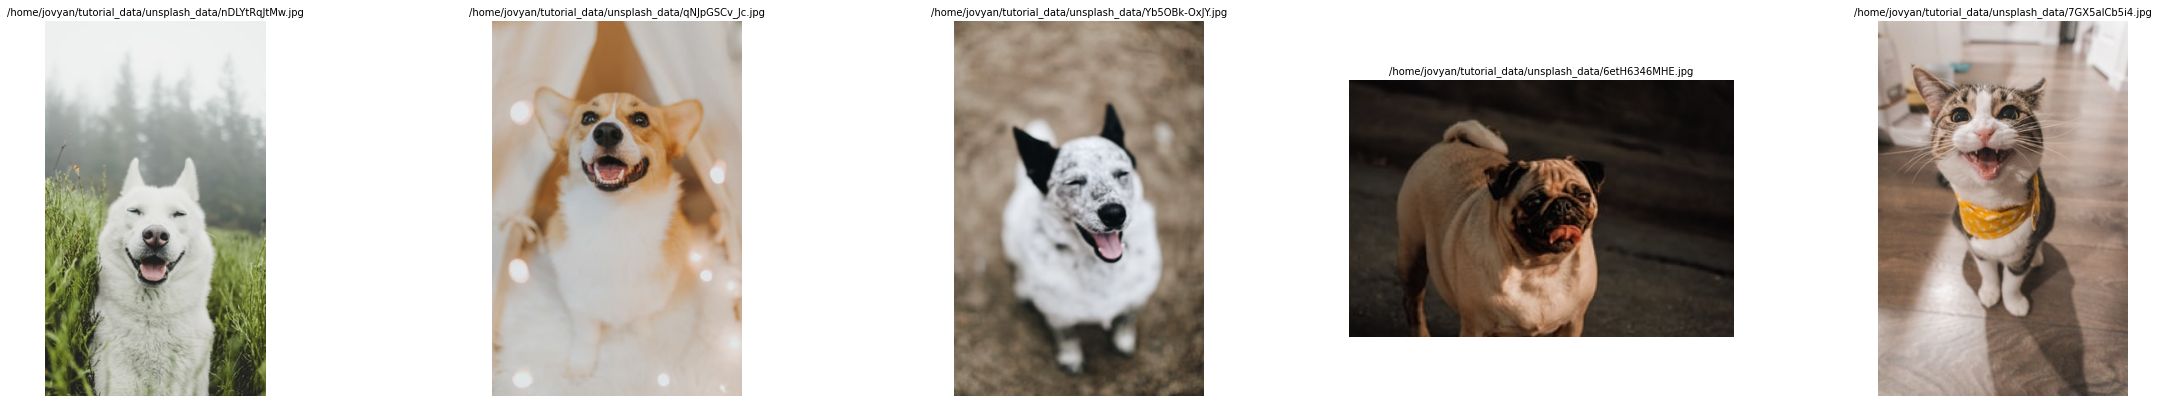

In [12]:
%%thanosql
PRINT IMAGE 
AS (
    SELECT image_path, tutorial_search_clip_clipen_similarity1 
    FROM (
        SEARCH IMAGE text="the feeling when your program finally works"
        USING tutorial_search_clip
        AS 
        SELECT * 
        FROM unsplash_data
        )
    ORDER BY tutorial_search_clip_clipen_similarity1 DESC 
    LIMIT 5
    )